# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 2. Методы нахождения оценок
### Дедлайн --- 16 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Загрузим все необходимые датасеты. Если что-то пошло не так, то просто скачайте файлы по ссылке вручную.

In [31]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Downloading...
From: https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
To: /home/mrkakek/stats/Cauchy.csv
100%|███████████████████████████████████████| 18.7k/18.7k [00:00<00:00, 578kB/s]
Downloading...
From: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
To: /home/mrkakek/stats/Weibull.csv
100%|██████████████████████████████████████| 17.9k/17.9k [00:00<00:00, 12.4MB/s]


In [32]:
import pandas as pd
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

## Задача 1

На высоте 1 метр от поверхности Земли закреплено устройство,
которое периодически излучает лучи на поверхность Земли (считайте,
что поверхность Земли представляет из себя прямую). Пусть $l$ —
перпендикуляр к поверхности Земли, опущенный из точки, в которой
закреплено устройство. Угол к прямой $l$ (под которым происходит
излучение) устройство выбирает случайно из равномерного
распределения на отрезке $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$ (все выборы
осуществляются независимо). В этих предположениях точки пересечения
с поверхностью имеют распределение Коши с плотностью $p(x) =
\frac{1}{\pi(1 + (x-x_0)^2)}.$ Неизвестный параметр сдвига $x_0$
соответствует проекции точки расположения устройства на поверхность
Земли (направление оси и начало координат на поверхности Земли
выбраны заранее некоторым образом независимо от расположения
устройства). В файле `Cauchy.csv` находятся координаты точек
пересечения лучей с поверхностью Земли.

In [33]:
cauchy_sample = pd.read_csv("Cauchy.csv")["sample"].values

 Оцените параметр сдвига
методом максимального правдоподобия 
* по первым 10 измерениям
* по первым 100 измерениям
* по всей выборке. 

Оценку произведите по сетке (т.е. возьмите набор
точек с некоторым шагом и верните ту, на которой достигается
максимум функции правдоподобия). Известно, что параметр сдвига принадлежит интервалу $[-1000, 1000].$ Выберите шаг равным 0.01. Интервал можете итеративно уменьшать, но не стоит делать его длину меньше 50.


In [34]:
def make_likelihood_estimation(sample, grid, distribution_pdf):
    likelihood_points = distribution_pdf(np.asmatrix(sample).T, grid)
    best = likelihood_points.sum(axis = 0).argmax()
    return grid[best]

In [35]:
grid = np.linspace(-1000,1000,200001)
distribution_pdf = lambda x, grid: -np.log(1 + np.power((x - grid), 2))

In [36]:
N_s = [10 , 100, len(cauchy_sample)]

for n in N_s:
    theta = make_likelihood_estimation(cauchy_sample[:n], grid, distribution_pdf)
    print(f"Оценка параметра сдвига методом максимального правдоподобия по первым {n} измерениям равна ")
    print(np.round(theta, 5))

Оценка параметра сдвига методом максимального правдоподобия по первым 10 измерениям равна 
208.53
Оценка параметра сдвига методом максимального правдоподобия по первым 100 измерениям равна 
207.9
Оценка параметра сдвига методом максимального правдоподобия по первым 1000 измерениям равна 
207.98


Теперь мы представляем, где лежит параметр. Попробуем улучшить оценку, уменьшив размер сетки. Количество элементов в сетке оставим прежним, а расстояние между границами уменьшим до 100.

In [37]:
grid = np.linspace(157, 357, 200000)
for n in N_s:
    theta = make_likelihood_estimation(cauchy_sample[:n], grid, distribution_pdf)
    print(f"Оценка параметра сдвига методом максимального правдоподобия по первым {n} измерениям равна ")
    print(np.round(theta, 5))

Оценка параметра сдвига методом максимального правдоподобия по первым 10 измерениям равна 
208.52726
Оценка параметра сдвига методом максимального правдоподобия по первым 100 измерениям равна 
207.89925
Оценка параметра сдвига методом максимального правдоподобия по первым 1000 измерениям равна 
207.97825


Сравните полученные результаты с `sps.cauchy.fit`

In [38]:
scipy_theta = sps.cauchy.fit(cauchy_sample, fscale = 1)[0]
print("Оценка параметра сдвига от scipy")
print(np.round(scipy_theta, 5))
print("Разность полученной оценки и оценки от scipy")
print(make_likelihood_estimation(cauchy_sample, grid, distribution_pdf) - scipy_theta)

Оценка параметра сдвига от scipy
207.97829
Разность полученной оценки и оценки от scipy
-3.898076849395693e-05


Разность имеет порядок $10^{-5}$, следовательно метод максимального правдоподобия работает.

In [43]:
%%time
np.round(make_likelihood_estimation(cauchy_sample, grid, distribution_pdf),4)

CPU times: user 4.95 s, sys: 596 ms, total: 5.55 s
Wall time: 5.54 s


207.9783

In [44]:
%time
np.round(np.median(cauchy_sample),4)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.34 µs


207.9803

In [46]:
%%time
np.round(sps.cauchy.fit(cauchy_sample, fscale = 1)[0], 4)

CPU times: user 5.43 ms, sys: 0 ns, total: 5.43 ms
Wall time: 4.57 ms


207.9783

**Вывод**: Оценка, которая получилась методом максимального правдоподобия достаточно близка к оценке, полученной библиотекой. Тем не менее, исходя из времени, затраченного на подсчет оценки, можно сделать вывод, что библиотека находит ее не с помощью данного метода.

## Задача 2
В банкомате "Тинькофф" в Новом Корпусе МФТИ каждую минуту подсчитывается баланс по
сравнению с началом дня (6 часов утра). В полночь работники банка
измеряют две величины: $X^1$ – максимальное значение баланса за
день, $X^2$ – значение баланса в полночь. Считается, что величина
$X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В течение 10 лет каждый день банк проводил
измерение величины $X,$ получив в результате выборку $X_1, \ldots,
X_{3652}.$ В файле Weibull.csv находятся соответствующие измерения.

In [47]:
weibull_sample = np.loadtxt("Weibull.csv")

Постройте гистограмму выборки. Не забудьте подобрать `xlim`, `ylim` и параметр `bins`, чтобы гистограмма была информативна

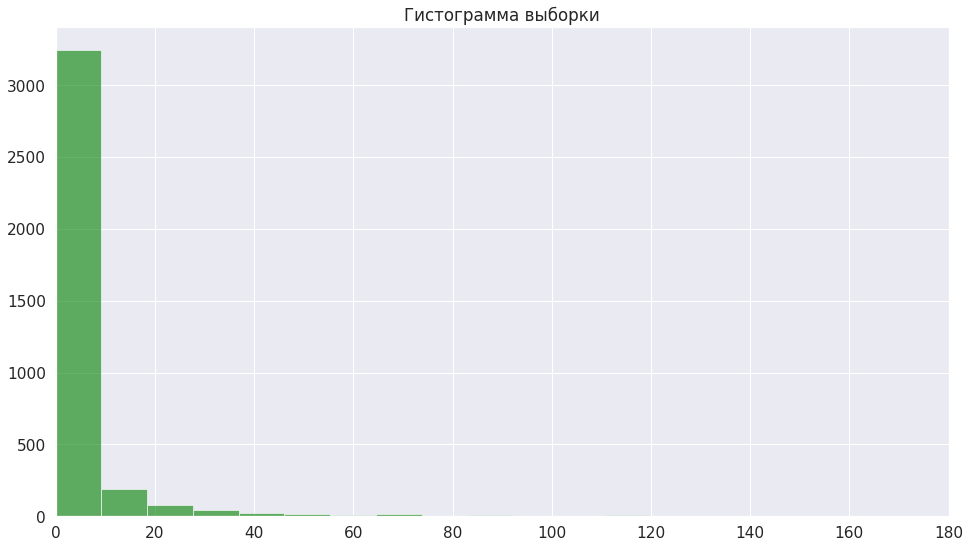

In [48]:
plt.figure(figsize = (16, 9))
plt.hist(weibull_sample, bins = 40, alpha = 0.6, color = 'green')
plt.title("Гистограмма выборки")
plt.xlim(0, 180)
plt.show()

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$


Однако здесь мы сталкиваемся с проблемой: в нашей выборке есть нули. А логарифм нуля, как известно, не определен. Мы предлагаем вам сравнить два способа рещения этой проблемы:

1. Отбросить нули до построения эмпирической функции распределения $\hat{F}(x)$
2. Построить эмпирическую функцию, а затем учитывать только те точки, x-координата которых положительна.

Для первого способа отфильтруйте выборку в ячейке ниже

In [49]:
weibull_filt_sample = weibull_sample[weibull_sample != 0]
nonzero_x = np.log(weibull_filt_sample)

Для каждого способа подсчитайте эмпирическую функцию распределения и 
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки. 

In [50]:
from statsmodels.distributions.empirical_distribution import ECDF

nonzero_empirical_func = ECDF(weibull_filt_sample)
nonzero_y = np.log(-np.log(1 - nonzero_empirical_func(weibull_filt_sample)))

<ipython-input-50-b2a540101368>:4: RuntimeWarning: divide by zero encountered in log
  nonzero_y = np.log(-np.log(1 - nonzero_empirical_func(weibull_filt_sample)))


In [51]:
empirical_func = ECDF(weibull_sample)
y = np.log(-np.log(1 - empirical_func(weibull_filt_sample)))

<ipython-input-51-194b68a01fef>:2: RuntimeWarning: divide by zero encountered in log
  y = np.log(-np.log(1 - empirical_func(weibull_filt_sample)))


Постройте график (`plt.scatter`) для первого способа красным цветом, а для второго — синим. Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла.

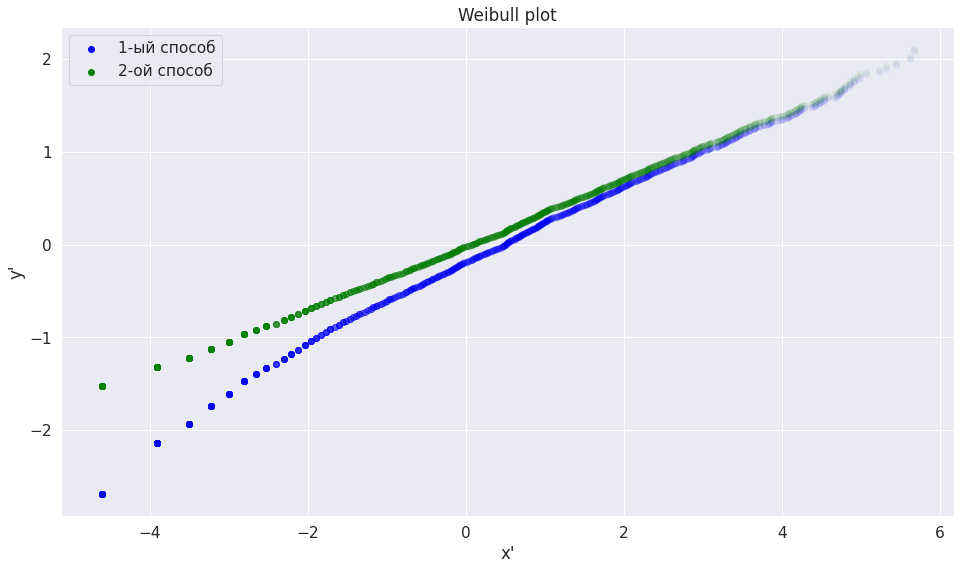

In [52]:
plt.figure(figsize = (16, 9))
plt.title('Weibull plot')
plt.xlabel('x\'')
plt.ylabel('y\'')
plt.scatter(nonzero_x, nonzero_y, alpha = 0.05, color = 'blue', label = '1-ый способ')
plt.scatter(nonzero_x, y, alpha = 0.05, color = 'green', label = '2-ой способ')
leg = plt.legend()
for legen in leg.legendHandles:
    legen.set_alpha(1)
plt.show()

Сделайте вывод. Какой способ вам кажется более правильным и почему?

**Вывод**: Более правильным кажется второй способ, так как при первом способе мы фактически изменяем распредение выборки.

Оцените параметр формы методом максимального правдоподобия 
* по
первым 4 годам; 
* по всей выборке.
Оценку произведите по сетке (в
логарифмической шкале). Известно, что $\log_{10}\gamma \in [-2, 2].$
Выберите шаг равным $10^{-3}.$

In [53]:
grid = 10 ** np.linspace(-2,2, 4000)
weibull_pdf = lambda x, grid: -np.power(x, grid) + np.log(x) * (grid - 1) + np.log(grid)
print("Оценка по первым четырем годам")
print(np.round(make_likelihood_estimation(weibull_filt_sample[:365 * 4], grid, weibull_pdf), 4))
print("Оценка по всей выборке")
print(np.round(make_likelihood_estimation(weibull_filt_sample, grid, weibull_pdf), 4))

Оценка по первым четырем годам
0.4144
Оценка по всей выборке
0.4106


Сравните результаты с `sps.weibull.fit(sample_2, fscale=1, floc=0)`

In [54]:
print("Оценка по всей выборке")
print(np.round(sps.weibull_min.fit(weibull_sample, fscale=1, floc=0)[0], 4))
print("Оценка по фильтрованной выборке")
print(np.round(sps.weibull_min.fit(weibull_filt_sample, fscale=1, floc=0)[0], 4))

Оценка по всей выборке
1.0
Оценка по фильтрованной выборке
0.4103


Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$) для того метода, который вам кажется более правильным. Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

**Вывод**

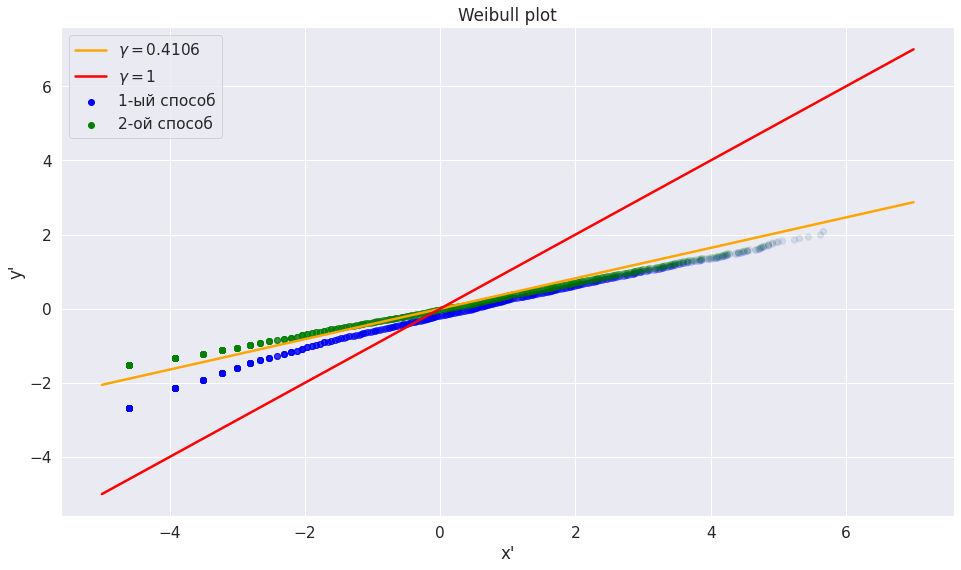

In [17]:
gamma = make_likelihood_estimation(weibull_filt_sample, grid, weibull_pdf)
plt.figure(figsize = (16, 9))
plt.scatter(nonzero_x, nonzero_y, alpha = 0.05, color = 'blue', label = '1-ый способ')
plt.scatter(nonzero_x, y, alpha = 0.05, color = 'green', label = '2-ой способ')
plt.title('Weibull plot')
plt.xlabel('x\'')
plt.ylabel('y\'')
grid = np.linspace(-5, 7, 2000)
plt.plot(grid, gamma * grid, linewidth = 2.5,  color = 'orange', label = fr"$\gamma =${np.round(gamma, 4)}")
plt.plot(grid, 1.0 * grid,linewidth = 2.5,  color = 'red', label = fr"$\gamma = 1$")
leg = plt.legend()
for legen in leg.legendHandles:
    legen.set_alpha(1)
plt.show()


**Вывод**: Оценка параметра, полученная skipy, значительно отличается для фильтрованной и неотфильтрованной выборки. Оценка, полученная для отфильтрованной выборки, совпадает с оценкой, полученной skipy. Оценка, построенная по неотфильтрованной выборке, ближе к оценке, полученной skipy. 

## Задача 3

Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**), $\theta = 3$ для всех распределений $(N = 1000).$ Для всех $n \leq N$ посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Постройте график ошибки оценки от реального значения ($|\hat\theta - \theta|_{l_1}$) относительно размера выборки.

In [55]:
n = 1000
theta = 3

uniform_sample = sps.uniform(loc = 0, scale = theta).rvs(n)
norm_sample = sps.norm(loc = 0, scale = np.sqrt(theta)).rvs(n)
gamma_sample = sps.gamma(1, scale = theta).rvs(n)

est_uniform = 2 * uniform_sample.cumsum() / np.arange(1, n + 1)
est_norm = np.power(norm_sample, 2).cumsum() / np.arange(1, n + 1)
est_gamma = gamma_sample.cumsum() / np.arange(1, n + 1)

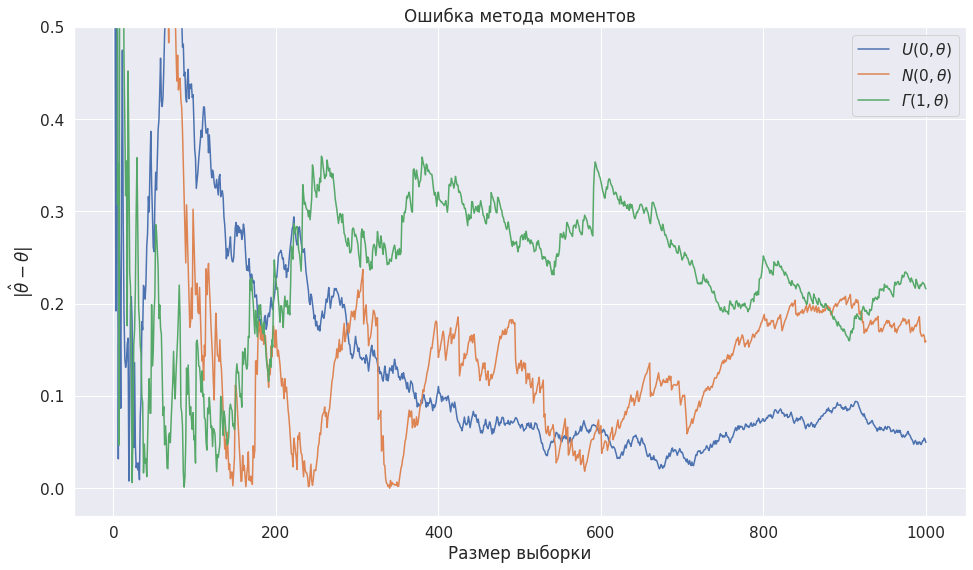

In [56]:
plt.figure(figsize = (16, 9))
labels = [r'$U(0, \theta)$', r'$N(0, \theta)$', r'$Г(1, \theta)$']
ests = [est_uniform, est_norm, est_gamma]
for est, label in zip(ests, labels):
    plt.plot(np.arange(1, len(est) + 1), np.abs(est - theta), label = label)
plt.title("Ошибка метода моментов")
plt.xlabel("Размер выборки")
plt.ylabel(r"$|\hat\theta - \theta|$")
plt.ylim(-0.03, 0.5)
plt.legend()
plt.show()

### Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка). На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Давайте возьмем нашу выборку размера $N$ и сгенерируем из нее еще $K$ выборок. Более формально для каждой бутстрепной выборки N раз будем выбирать элементы из исходной выборки с возвращением. Полученная таким образом выборка будет содержать $\approx 63$% уникальных элементов, но это не страшно. Для всех $K$ выборок посчитаем оценку $\hat\theta$. Таким образом мы получим $K$ оценок параметра. Можно показать, что если размер бутстрепных выборок и исходной совпадают, то оценка дисперсии $s^2(\hat\theta)$, полученная из $K$ оценок, будет *хорошей*.

Для каждого распределения из предыдущего пункта (Пожалуйста, не пишите цикл по распределениям. Сделайте три отдельные ячейки) для каждого $K$ из `[10] + [50] + list(range(100, 1001, 100))` сгенерируйте K бутстрепных выборок и посчитайте дисперсию бутстрепных оценок и посчитайте среднее по K выборкам. Размер бутстрепной выборки сделайте равным $K$, незабудьте уменьшить размер исходной выборки до $K$. Постройте график следующим образом: по оси $x$ отложите значения $K$, красной линией обозначьте среднее значение $\hat\theta$ бутстрепных выборок для каждого $K$. Посчитайте стандартное отклонение оценки для каждого $K$ и закрасьте интервал $\mu(k) \pm \sigma(\hat\theta)$ (`plt.fillbetween`).



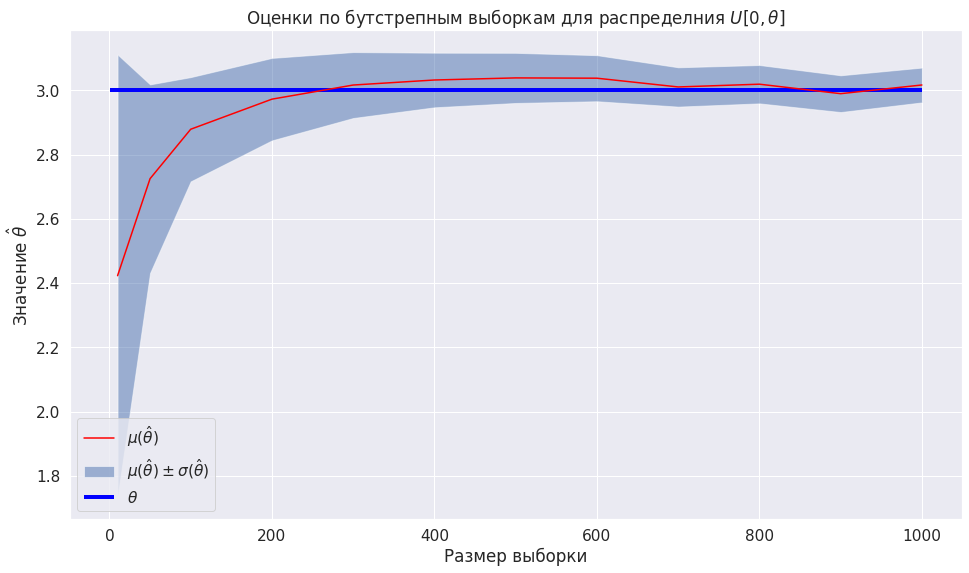

In [274]:
K_s = [10] + [50] + list(range(100, 1001, 100))
mean_vals = np.array([])
variance_vals = np.array([])
for k in K_s:
    fixed_sample = uniform_sample[:k]
    busttrap_samples = np.random.choice(fixed_sample, k * k).reshape([k, k])
    means = 2 * busttrap_samples.mean(axis = 0)
    mean_of_means = means.mean()
    
    mean_vals = np.append(mean_vals, mean_of_means)
    variance_vals = np.append(variance_vals, np.sqrt(np.power(means, 2).mean() - np.power(mean_of_means, 2)))

plt.figure(figsize = (16, 9))
plt.plot(K_s, mean_vals, color = 'red', label = r'$\mu(\hat\theta)$')
plt.fill_between(K_s, mean_vals - variance_vals, mean_vals + variance_vals, 
                 alpha = 0.5, label = r'$\mu(\hat\theta) \pm \sigma(\hat\theta)$')
plt.hlines(theta, 1, 1000, linewidth = 4, color = 'blue', label = r'$\theta$')
plt.xlabel('Размер выборки')
plt.ylabel(r'Значение $\hat\theta$')
plt.title(r'Оценки по бутстрепным выборкам для распределния $U[0, \theta]$')
plt.legend()
plt.show()

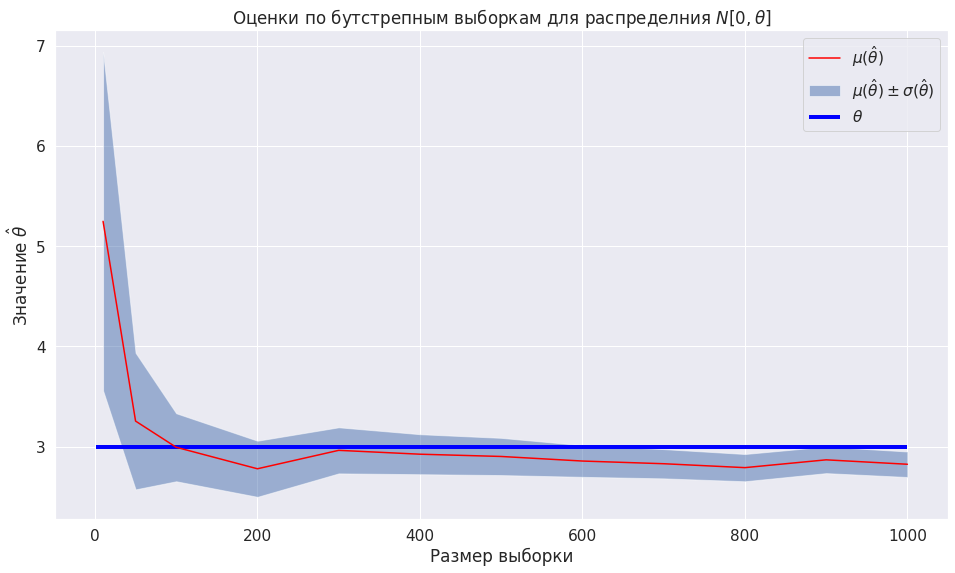

In [275]:
K_s = [10] + [50] + list(range(100, 1001, 100))
mean_vals = np.array([])
variance_vals = np.array([])
for k in K_s:
    fixed_sample = norm_sample[:k]
    busttrap_samples = np.random.choice(fixed_sample, k * k).reshape([k, k])
    means = np.power(busttrap_samples,2).mean(axis = 0)
    mean_of_means = means.mean()
    
    mean_vals = np.append(mean_vals, mean_of_means)
    variance_vals = np.append(variance_vals, np.sqrt(np.power(means, 2).mean() - np.power(mean_of_means, 2)))

plt.figure(figsize = (16, 9))
plt.plot(K_s, mean_vals, color = 'red', label = r'$\mu(\hat\theta)$')
plt.fill_between(K_s, mean_vals - variance_vals, mean_vals + variance_vals, 
                 alpha = 0.5, label = r'$\mu(\hat\theta) \pm \sigma(\hat\theta)$')
plt.hlines(theta, 1, 1000, linewidth = 4, color = 'blue', label = r'$\theta$')
plt.xlabel('Размер выборки')
plt.ylabel(r'Значение $\hat\theta$')
plt.title(r'Оценки по бутстрепным выборкам для распределния $N[0, \theta]$')
plt.legend()
plt.show()

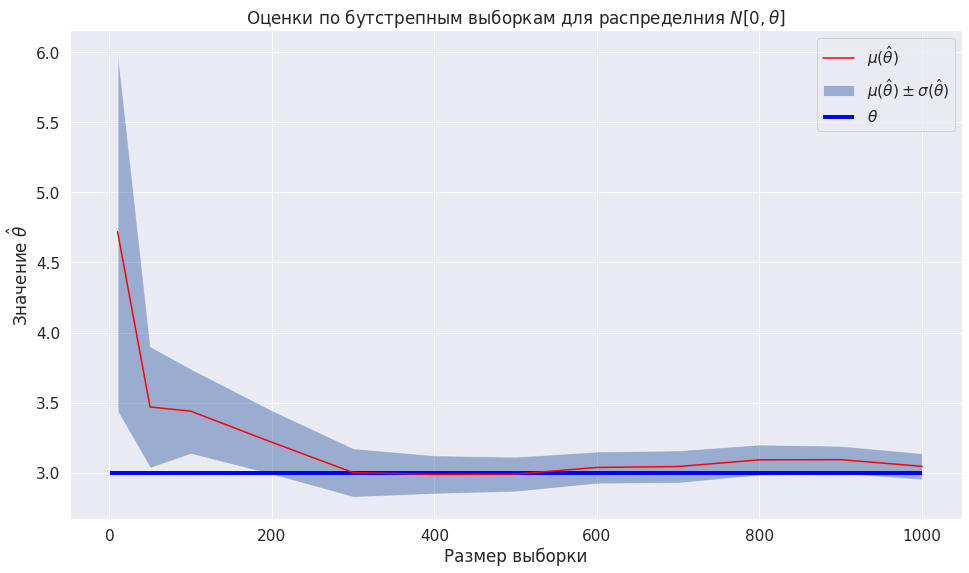

In [276]:
K_s = [10] + [50] + list(range(100, 1001, 100))
mean_vals = np.array([])
variance_vals = np.array([])
for k in K_s:
    fixed_sample = gamma_sample[:k]
    busttrap_samples = np.random.choice(fixed_sample, k * k).reshape([k, k])
    means = busttrap_samples.mean(axis = 0)
    mean_of_means = means.mean()
    
    mean_vals = np.append(mean_vals, mean_of_means)
    variance_vals = np.append(variance_vals, np.sqrt(np.power(means, 2).mean() - np.power(mean_of_means, 2)))

plt.figure(figsize = (16, 9))
plt.plot(K_s, mean_vals, color = 'red', label = r'$\mu(\hat\theta)$')
plt.fill_between(K_s, mean_vals - variance_vals, mean_vals + variance_vals, 
                 alpha = 0.5, label = r'$\mu(\hat\theta) \pm \sigma(\hat\theta)$')
plt.hlines(theta, 1, 1000, linewidth = 4, color = 'blue', label = r'$\theta$')
plt.xlabel('Размер выборки')
plt.ylabel(r'Значение $\hat\theta$')
plt.title(r'Оценки по бутстрепным выборкам для распределния $N[0, \theta]$')
plt.legend()
plt.show()

**Вывод**: Метод моментов всегда имеет аналитическое решение, при этом его вычисление происходит быстрее. Тем не менее, ошибка при этом подходе достаточно высокая.

Истинное значение параметра почти лежит в границах оценки $\pm$ стандартного отклонения.